<h1>UK ROAD ACCIDENTS DATA ANALYSIS</h1>
<H2>INCLUSIVE YEAR 2019 - 2022</H2>
<H3> ANALYST: JUNTEREAL,RUSS</H3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
accident = pd.read_csv('accident.csv')

In [3]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05/06/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02/07/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26/08/2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16/08/2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03/09/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18/02/2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21/02/2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23/02/2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23/02/2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [4]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [5]:
accident['Index'] = accident['Index'].astype('category')
accident['Accident_Severity'] = accident['Accident_Severity'].astype('category')
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], dayfirst = True, errors = 'coerce')
accident['Light_Conditions'] = accident['Light_Conditions'].astype('category')
accident['District Area '] = accident['District Area'].astype('category')
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].astype('category')
accident['Road_Type'] = accident['Road_Type'].astype('category')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].astype('category')
accident['Weather_Conditions'] = accident['Weather_Conditions'].astype('category')
accident['Vehicle_Type'] = accident['Vehicle_Type'].astype('category')
accident['Year'] = accident['Accident Date'].dt.year
accident['Month'] = accident['Accident Date'].dt.month
accident['Day'] = accident['Accident Date'].dt.day
accident['DayOfWeek'] = accident['Accident Date'].dt.dayofweek

In [6]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    660679 non-null  category      
 1   Accident_Severity        660679 non-null  category      
 2   Accident Date            660679 non-null  datetime64[ns]
 3   Latitude                 660654 non-null  float64       
 4   Light_Conditions         660679 non-null  category      
 5   District Area            660679 non-null  object        
 6   Longitude                660653 non-null  float64       
 7   Number_of_Casualties     660679 non-null  int64         
 8   Number_of_Vehicles       660679 non-null  int64         
 9   Road_Surface_Conditions  659953 non-null  category      
 10  Road_Type                656159 non-null  category      
 11  Urban_or_Rural_Area      660664 non-null  category      
 12  Weather_Conditio

In [7]:
accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
District Area                  0
Year                           0
Month                          0
Day                            0
DayOfWeek                      0
dtype: int64

In [8]:
accident['Latitude'].mode()
accident['Latitude'] = accident['Latitude'].fillna(accident['Latitude'].mode()[0])
accident['Longitude'].mode()
accident['Longitude'] = accident['Longitude'].fillna(accident['Longitude'].mode()[0])
accident['Road_Surface_Conditions'].mode()
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna(accident['Road_Surface_Conditions'].mode()[0])
accident['Road_Type'].mode()
accident['Road_Type'] = accident['Road_Type'].fillna(accident['Road_Type'].mode()[0])
accident['Urban_or_Rural_Area'].mode()
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].fillna(accident['Urban_or_Rural_Area'].mode()[0])
accident['Weather_Conditions'].mode()
accident['Weather_Conditions'] = accident['Weather_Conditions'].fillna(accident['Weather_Conditions'].mode()[0])

In [9]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
District Area              0
Year                       0
Month                      0
Day                        0
DayOfWeek                  0
dtype: int64

<h1>What is the percentage distribution of accident severity?</h1>

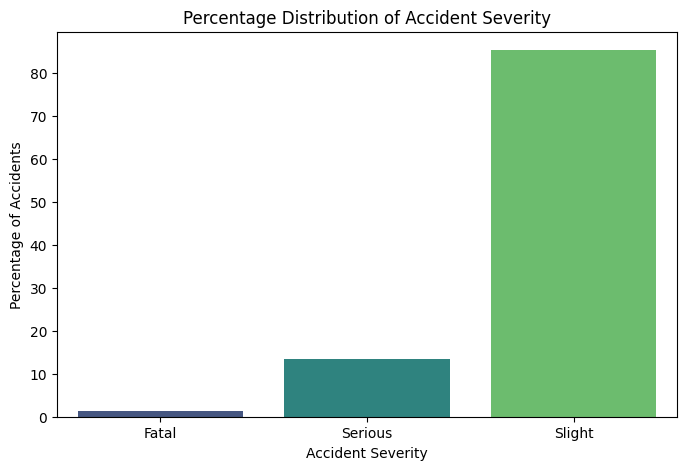

In [55]:
severity_distribution = accident['Accident_Severity'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 5))
sns.barplot(x=severity_distribution.index, y=severity_distribution.values, palette='viridis')

plt.xlabel('Accident Severity')
plt.ylabel('Percentage of Accidents')
plt.title('Percentage Distribution of Accident Severity')
plt.show()

<h1>Insight No.1</h1>
<h2>The vast majority of accidents (85.34%) are slight, while serious accidents account for 13.35%, and fatal accidents are rare at just 1.31%, indicating that while accidents are common, most are not life-threatening.</h2>

<h1>How many accidents occurred in each year?</h1>

In [11]:
accident_per_year = accident['Year'].value_counts()

In [12]:
accident_per_year

Year
2019    182115
2020    170591
2021    163554
2022    144419
Name: count, dtype: int64

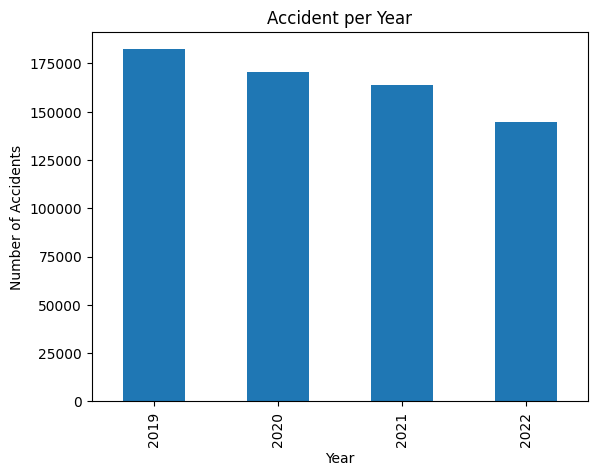

In [13]:
accident_per_year.plot(kind='bar')
plt.title('Accident per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

<h1>Insight No.2</h1>
<h2>The total number of accidents over four years is 660,679, with 2019 accounting for the highest share (27.6%) and 2022 the lowest (21.9%), showing a consistent decline in accidents each year.</h2>

<h1>On which day of the week do most accidents occur?</h1>

In [69]:
accident_per_day = accident['DayOfWeek'].value_counts()

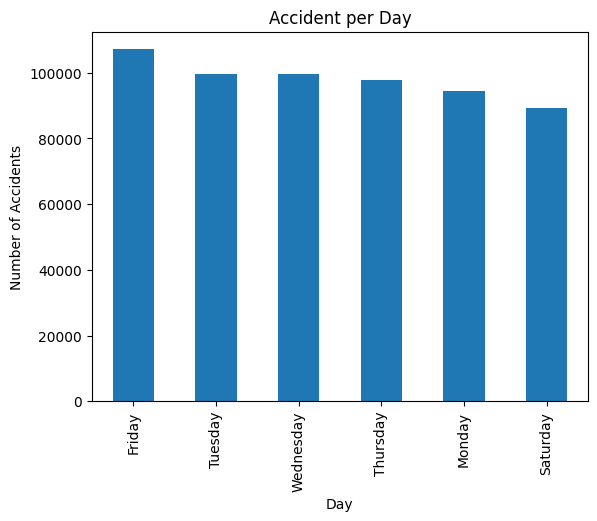

In [70]:
accident_per_day.plot(kind='bar')
plt.title('Accident per Day')
plt.xlabel('Day')
plt.ylabel('Number of Accidents')
plt.show()

<h1>Insight No.3</h1>
<h2>Fridays have the highest number of accidents, suggesting increased traffic and possibly fatigued or rushed driving at the end of the workweek, while Sundays have the least.</h2>

<h1>Which month has the highest accident severity?</h1>

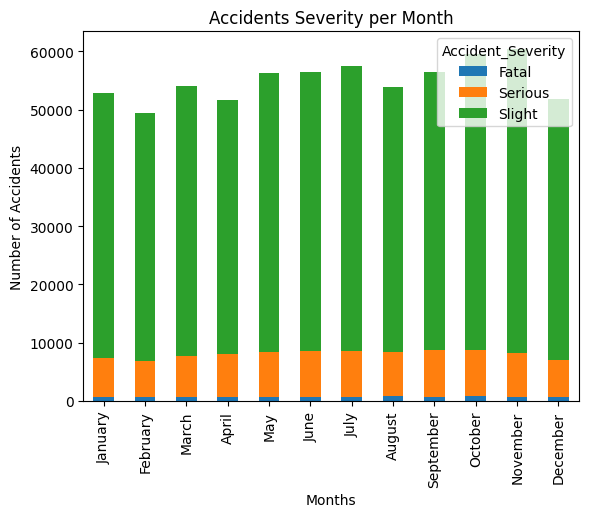

In [16]:
accident_severity = accident.groupby('Month')['Accident_Severity'].value_counts().unstack()
accident_severity

month_names = {1.0: 'January',
            2: 'February',
            3: 'March',
            4: 'April',
            5: 'May',
            6: 'June',
            7: 'July',
            8: 'August',
            9: 'September',
            10: 'October',
            11: 'November',
            12: 'December',     
           }
accident_severity.index = accident_severity.index.map(month_names)
accident_severity.plot(kind='bar', stacked = True)
plt.title('Accidents Severity per Month')
plt.xlabel('Months')
plt.ylabel('Number of Accidents')
plt.show()

<h1>Insight No.4</h1>
<h2>November has the highest number of accidents overall, but August records the highest number of fatal accidents (801).</h2>

<h1>Top 5 districts with the most accidents?</h1>

In [17]:
top_5_DA = accident['District Area'].value_counts().head(5)
top_5_DA

District Area
Birmingham    13491
Leeds          8898
Manchester     6720
Bradford       6212
Sheffield      5710
Name: count, dtype: int64

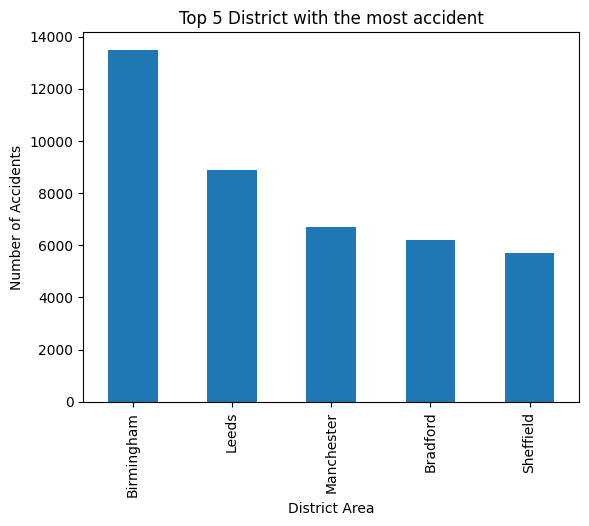

In [18]:
top_5_DA.plot(kind='bar')
plt.title('Top 5 District with the most accident')
plt.xlabel('District Area')
plt.ylabel('Number of Accidents')
plt.show()

<h1>Insight No.5</h1>
<h2>Birmingham accounts for 19.2%, Leeds 12.7%, Manchester 9.6%, Bradford 8.8%, and Sheffield 8.1% of accidents among the top five districts, highlighting Birmingham as the most accident-prone area.</h2>

<h1>How many accidents happened in urban vs rural areas??</h1>

In [1]:
urban_vs_rural = accident['Urban_or_Rural_Area'].value_counts()

NameError: name 'accident' is not defined

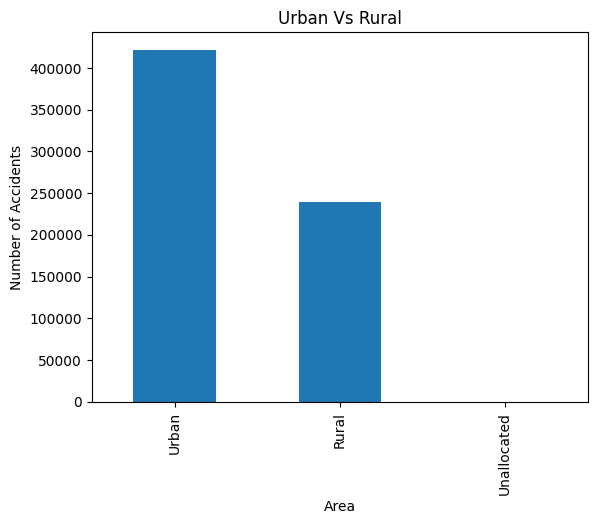

In [20]:
urban_vs_rural.plot(kind='bar')
plt.title('Urban Vs Rural')
plt.xlabel('Area')
plt.ylabel('Number of Accidents')
plt.show()

<h1>Insight No.6</h1>
<h2>Urban areas account for 63.8% of accidents, while rural areas make up 36.2%, indicating that accidents are significantly more frequent in urban settings</h2>

<h1>Which vehicle type is most commonly involved in accidents in urban areas?</h1>

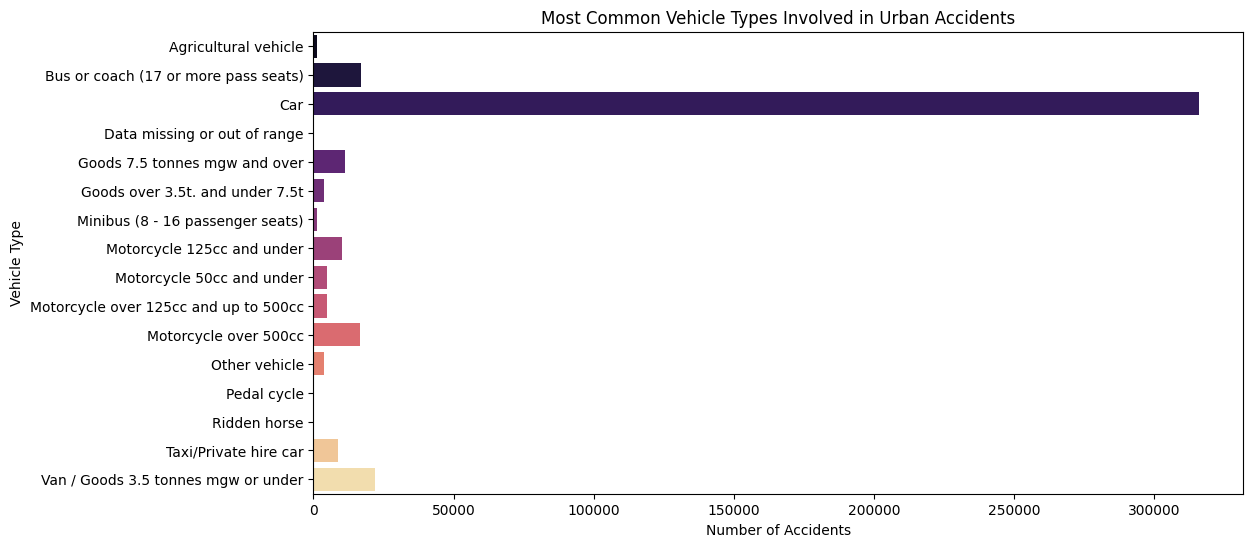

In [58]:
urban_vehicle_counts = accident[accident['Urban_or_Rural_Area'] == 'Urban']['Vehicle_Type'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=urban_vehicle_counts.values, y=urban_vehicle_counts.index, palette='magma')

plt.xlabel('Number of Accidents')
plt.ylabel('Vehicle Type')
plt.title('Most Common Vehicle Types Involved in Urban Accidents')

plt.show()

<h1>Insight No.7</h1>
<h2>Cars dominate urban accidents, making up the vast majority, while motorcycles and taxis also contribute significantly, highlighting the risk for both private and commercial vehicles in urban areas</h2>

<h1>Which vehicle type is most commonly involved in accidents in rural areas??</h1>

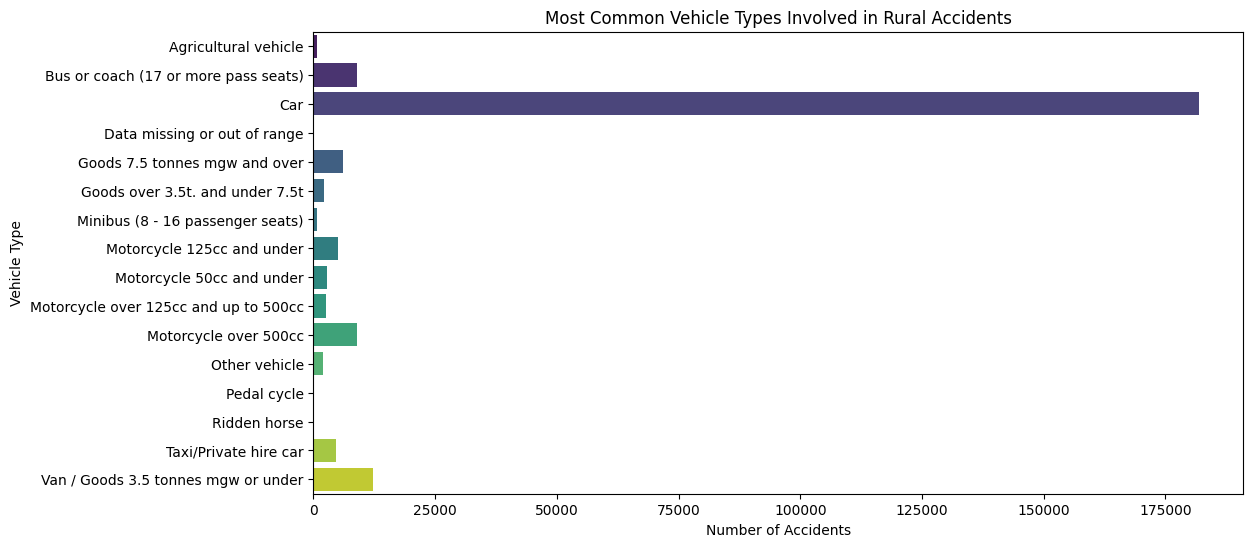

In [52]:
rural_vehicle_counts = accident[accident['Urban_or_Rural_Area'] == 'Rural']['Vehicle_Type'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=rural_vehicle_counts.values, y=rural_vehicle_counts.index, palette='viridis')

plt.xlabel('Number of Accidents')
plt.ylabel('Vehicle Type')
plt.title('Most Common Vehicle Types Involved in Rural Accidents')

plt.show()

<h1>Insight No.8</h1>
<h2>Cars are the most involved vehicles in rural accidents, but motorcycles but especially those over 500cc it appears more frequently in rural areas compared to urban areas, suggesting a higher risk for motorcyclists on rural roads.</h2>

<h1>Do wet road conditions lead to more severe accidents?</h1>

In [23]:
Severity_road_condition = accident.groupby('Road_Surface_Conditions')['Accident_Severity'].value_counts().unstack()
Severity_road_condition

Accident_Severity,Fatal,Serious,Slight
Road_Surface_Conditions,,,
Dry,5790,61708,381049
Flood over 3cm. deep,23,152,842
Frost or ice,193,2007,16317
Snow,35,565,5290
Wet or damp,2620,23785,160303


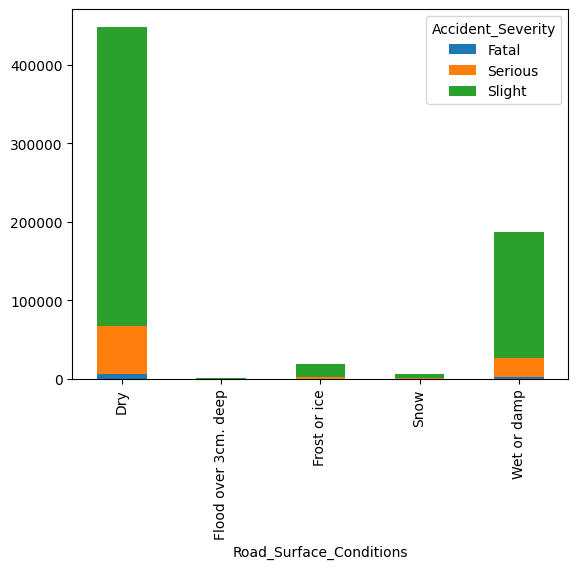

In [24]:
Severity_road_condition.plot(kind ='bar',stacked = True)
plt.show()

<h1>Insight No.9</h1>
<h2>Wet or damp roads account for a significant proportion of serious (27.7%) and fatal (28.9%) accidents compared to dry roads, indicating that wet conditions increase the risk of severe accidents.</h2>

<h1>Are accidents more severe at night than during the day?</h1>

<Figure size 1200x600 with 0 Axes>

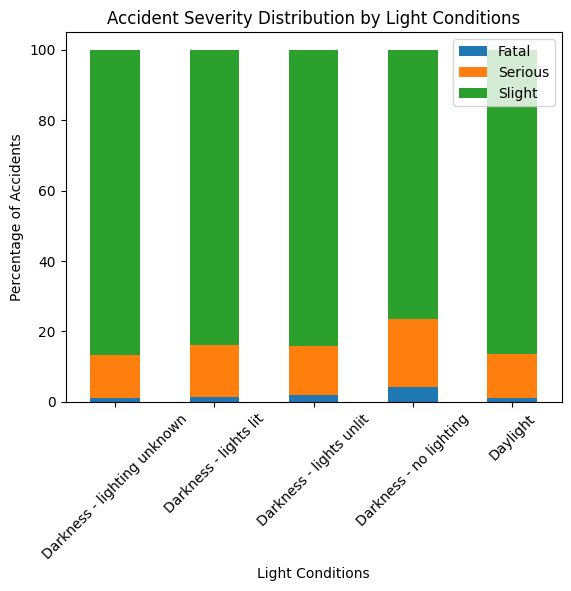

In [50]:
light_severity = accident.groupby('Light_Conditions')['Accident_Severity'].value_counts(normalize=True) * 100
light_severity = light_severity.unstack()

plt.figure(figsize=(12, 6))
light_severity.plot(kind='bar', stacked=True)

plt.xlabel('Light Conditions')
plt.ylabel('Percentage of Accidents')
plt.title('Accident Severity Distribution by Light Conditions')
plt.xticks(rotation=45)
plt.legend()
plt.show()

<h1>Insight No.10</h1>
<h2>Accidents in complete darkness with no lighting have the highest severity, with 19.16% serious and 4.31% fatal, nearly quadrupling the fatality rate compared to daylight (1.05%), highlighting the dangers of poorly lit roads at night.</h2>

<h1>Correlation between accident severity and weather conditions?</h1>

In [26]:
accident_weather_severity =  accident.groupby('Weather_Conditions')['Accident_Severity'].value_counts().unstack()
accident_weather_severity

Accident_Severity,Fatal,Serious,Slight
Weather_Conditions,,,
Fine + high winds,175,1245,7134
Fine no high winds,7207,73285,454521
Fog or mist,82,483,2963
Other,165,1801,15184
Raining + high winds,145,1261,8209
Raining no high winds,848,9468,69380
Snowing + high winds,3,109,773
Snowing no high winds,36,565,5637


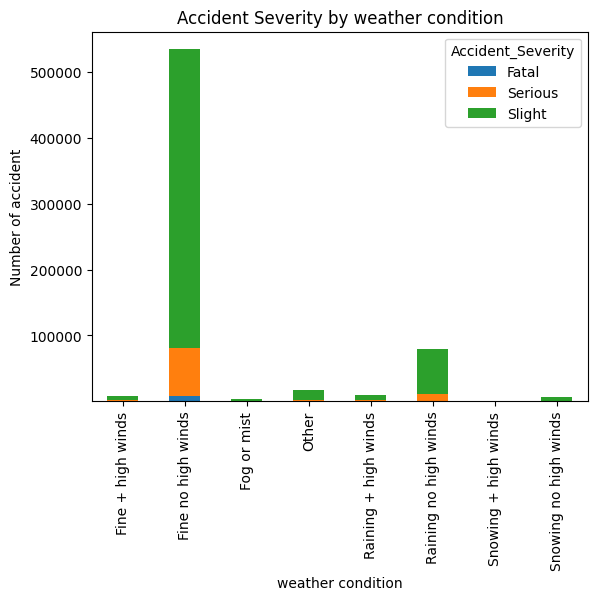

In [27]:
accident_weather_severity.plot(kind ='bar', stacked=True)
plt.title("Accident Severity by weather condition")
plt.xlabel("weather condition")
plt.ylabel("Number of accident")
plt.show()

<h1>Insight No.11</h1>
<h2>Fatal accidents are highest in "Fine no high winds" conditions (7,207), but the proportion of severe accidents is noticeably higher in adverse weather like "Raining + high winds" and "Fog or mist," suggesting that while most accidents happen in clear weather due to higher traffic volume, bad weather increases accident severity</h2>

<h1>Which road type has the highest number of fatal accidents?<h1>

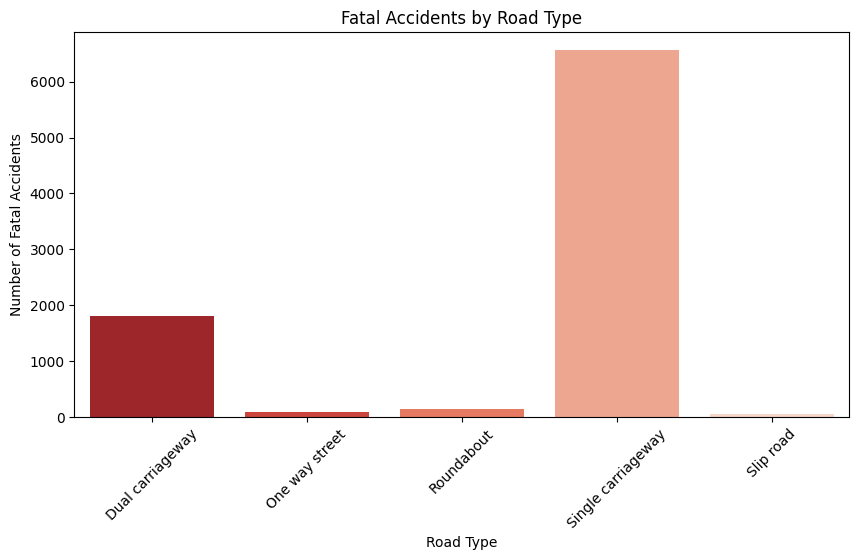

In [68]:
fatal_road_counts = accident[accident['Accident_Severity'] == 'Fatal']['Road_Type'].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(x=fatal_road_counts.index, y=fatal_road_counts.values, palette="Reds_r")
plt.xlabel('Road Type')
plt.ylabel('Number of Fatal Accidents')
plt.title('Fatal Accidents by Road Type')
plt.xticks(rotation=45)
plt.show()

<h1>Insight No.12</h1>
<h2>Single carriageways account for the highest number of fatal accidents (6,560), making up the majority, while fatalities on roundabouts, one-way streets, and slip roads are significantly low</h2>

<h1>Which vehicle type has the highest proportion of fatal accidents?<h1>

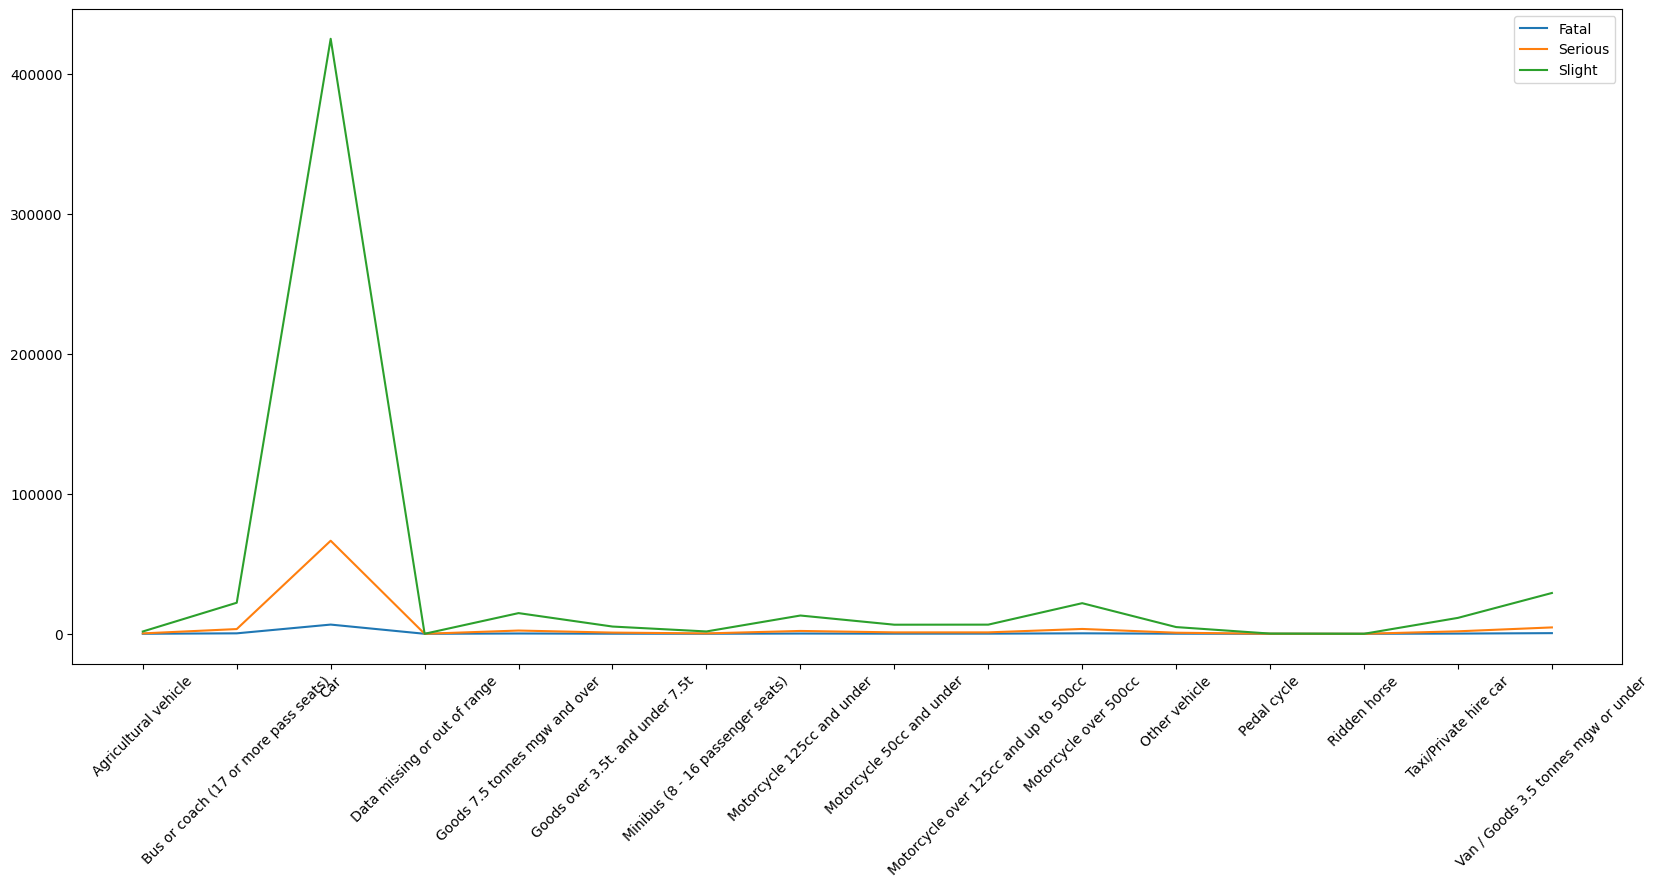

In [29]:
acc_VA = accident.groupby('Vehicle_Type')['Accident_Severity'].value_counts().reset_index(name = 'accidents_Counts')
acc_VA

sy_pivot = acc_VA.pivot (index = 'Vehicle_Type', columns = 'Accident_Severity', values = 'accidents_Counts')

plt.plot(sy_pivot.index, sy_pivot['Fatal'],label='Fatal')
plt.plot(sy_pivot.index, sy_pivot['Serious'],label='Serious')
plt.plot(sy_pivot.index, sy_pivot['Slight'],label='Slight')
fig = plt.gcf()
fig.set_size_inches(20, 8.5)
plt.xticks(rotation=45)
plt.legend()
plt.show()

<h1>Insight No.13</h1>
<h2>Cars have the highest proportion of fatal accidents at 3.05%, significantly higher than all other vehicle types, highlighting their vulnerability on the roads compared to motor vehicles</h2>

<h1>What is the severity distribution for motorcycle accidents?<h1>

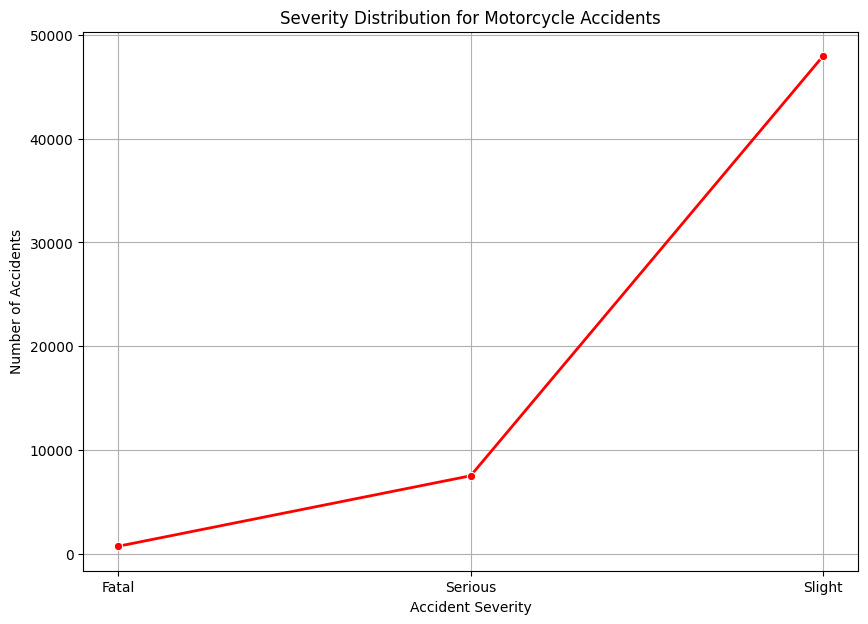

In [46]:
motorcycle_severity = accident[accident['Vehicle_Type'].str.contains('Motorcycle', na=False)]['Accident_Severity'].value_counts()

plt.figure(figsize=(10, 7))
sns.lineplot(x=motorcycle_severity.index, y=motorcycle_severity.values, marker='o', linewidth=2, color='red')
plt.xlabel('Accident Severity')
plt.ylabel('Number of Accidents')
plt.title('Severity Distribution for Motorcycle Accidents')
plt.grid(True)
plt.show()

<h1>Insight No.14</h1>
<h2>Motorcycle accidents have a higher severity rate, with 14.7% classified as serious and 1.43% as fatal, making them more dangerous compared to the overall accident severity distribution.</h2>

<h1>Which month had the most severe accidents?<h1>

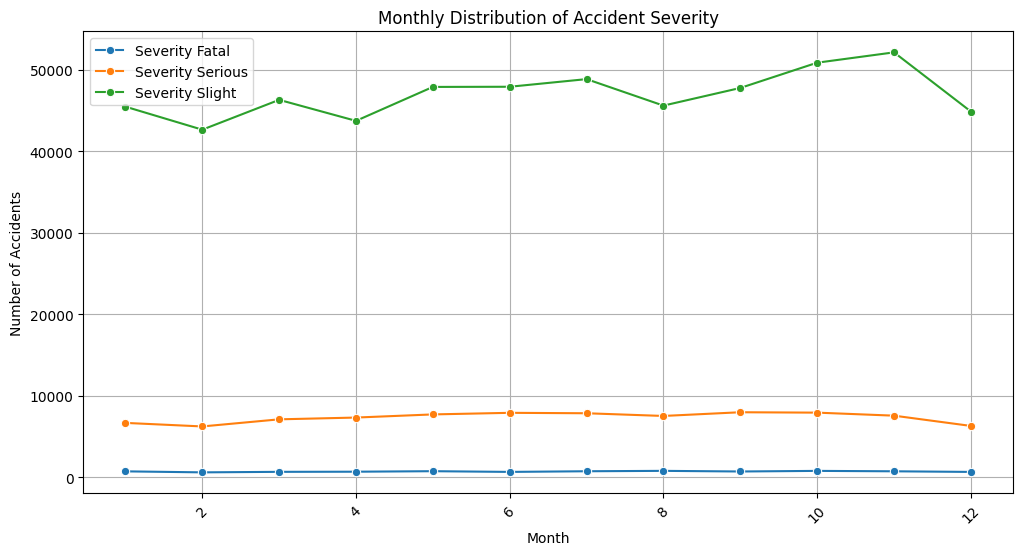

In [75]:
severe_month = accident.groupby('Month')['Accident_Severity'].value_counts().unstack()

plt.figure(figsize=(12, 6))
for severity in severe_month.columns:
    sns.lineplot(x=severe_month.index, y=severe_month[severity], marker='o', label=f'Severity {severity}')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.title('Monthly Distribution of Accident Severity')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.show()

<h1>Insight No.15</h1>
<h2>The most fatal motorcycle accidents occur in "Fine no high winds," "Dry roads," and "Daylight" conditions (3,718 cases).</h2>

<h1>Are accidents more severe on weekends?<h1>

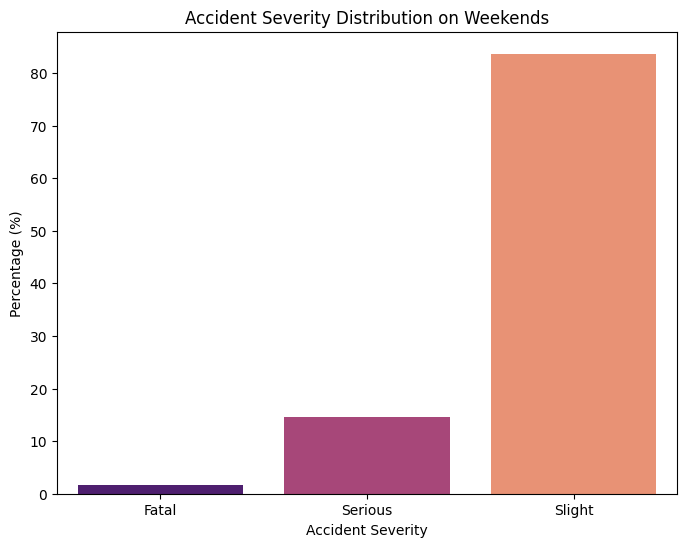

In [42]:
weekend_severity = accident[accident['DayOfWeek'].isin(['Saturday', 'Sunday'])]['Accident_Severity'].value_counts(normalize=True) * 100
weekend_severity

plt.figure(figsize=(8, 6))
sns.barplot(x=weekend_severity.index, y=weekend_severity.values, palette='magma')
plt.xlabel('Accident Severity')
plt.ylabel('Percentage (%)')
plt.title('Accident Severity Distribution on Weekends')
plt.show()

<h1>Insight No.16</h1>
<h2>Weekend accidents have a slightly higher fatality rate (1.45%) compared to the overall average (1.31%)</h2>

<h1>Do accidents in December have a higher severity compared to other months<h1>

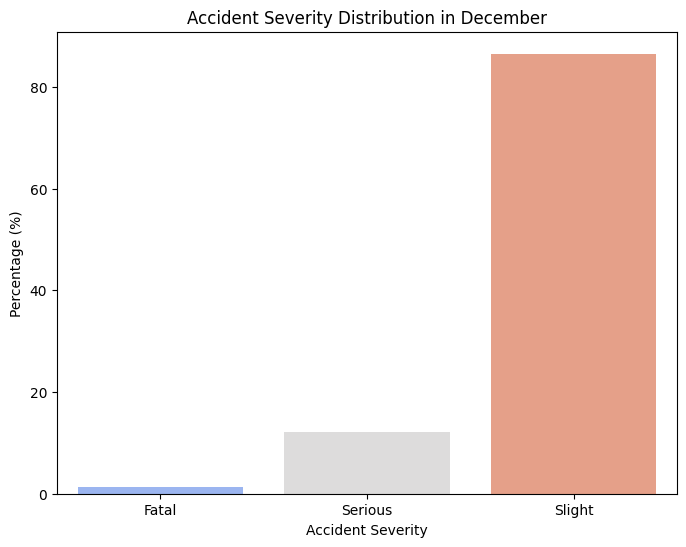

In [33]:
severity_dist = accident[accident['Month'] == 12]['Accident_Severity'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
sns.barplot(x=severity_dist.index, y=severity_dist.values, palette='coolwarm')
plt.xlabel('Accident Severity')
plt.ylabel('Percentage (%)')
plt.title('Accident Severity Distribution in December')
plt.show()


<h1>Insight No.17</h1>
<h2>December accidents have a slightly lower serious accident rate (12.17%) and a nearly identical fatality rate (1.29%) compared to the overall average</h2>

<h1>top 5 district that lowest Number of accident?<h1>

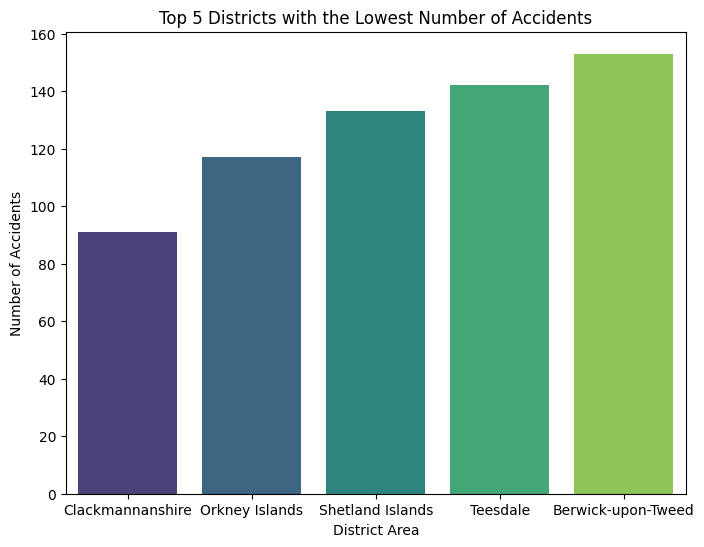

In [34]:
top_5_DA = accident['District Area'].value_counts().nsmallest(5)
top_5_DA

plt.figure(figsize=(8, 6))
sns.barplot(x=top_5_DA.index, y=top_5_DA.values, palette='viridis')
plt.xlabel('District Area')
plt.ylabel('Number of Accidents')
plt.title('Top 5 Districts with the Lowest Number of Accidents')
plt.show()

<h1>Insight No.18</h1>
<h2>The five districts with the lowest number of accidents are Clackmannanshire, Orkney Islands, Shetland Islands, Teesdale, Berwick-upon-Tweed.These areas experience significantly fewer accidents compared to other districts.</h2>

<h1>Which day of the week has the most multi-vehicle accidents?<h1>

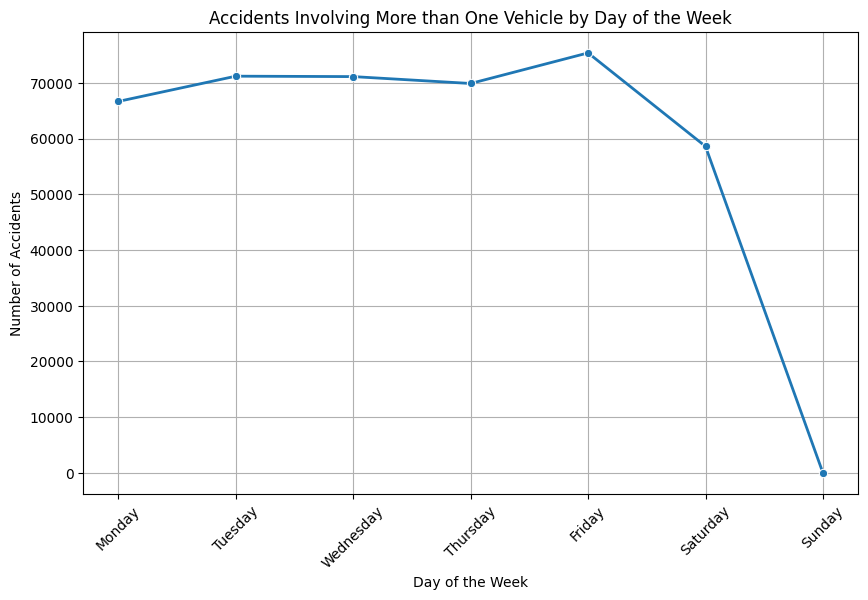

In [35]:
day_map = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 
           5: 'Friday', 6: 'Saturday', 7: 'Sunday'}
if accident['DayOfWeek'].dtype != 'O':
    accident['DayOfWeek'] = accident['DayOfWeek'].map(day_map)
    
accident_filtered = accident[accident['Number_of_Vehicles'] > 1]
daywise_accidents = accident_filtered.groupby('DayOfWeek').size()

# Sorting and ensuring all days are included
daywise_accidents = daywise_accidents.reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    fill_value=0  
)

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x=daywise_accidents.index, y=daywise_accidents.values, marker='o', linewidth=2)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.title('Accidents Involving More than One Vehicle by Day of the Week')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


<h1>Insight No.19</h1>
<h2>Fridays have the highest number of multi-vehicle accidents (75,361), likely due to increased traffic congestion as people commute before the weekend, while Sundays have the least (47,122)</h2>

<h1>How many accidents occured per Month?<h1>

In [36]:
accidents_per_Month = accident['Month'].value_counts().sort_index()
accidents_per_Month

Month
1     52872
2     49491
3     54086
4     51744
5     56352
6     56481
7     57445
8     53913
9     56455
10    59580
11    60424
12    51836
Name: count, dtype: int64

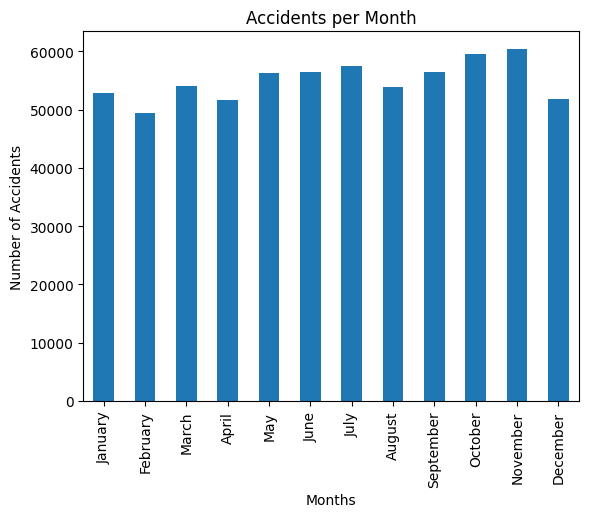

In [37]:
month_names = {1.0: 'January',
            2: 'February',
            3: 'March',
            4: 'April',
            5: 'May',
            6: 'June',
            7: 'July',
            8: 'August',
            9: 'September',
            10: 'October',
            11: 'November',
            12: 'December',     
           }
accidents_per_Month.index = accidents_per_Month.index.map(month_names)
accidents_per_Month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Months')
plt.ylabel('Number of Accidents')
plt.show()

<h1>Insight No.20</h1>
<h2>December and November  have the highest number of  accidents and the Lowest is the Month of January</h2>